# National Bureau of Economic Research (NBER)

According to its website, NBER was founded in 1920 and is a private, non-profit, non-partisan organization dedicated to conducting economic research and to disseminating research findings among academics, public policy makers, and business professionals. NBER-affiliated researchers study a wide range of topics and they employ many different methods in their work. Key focus areas include developing new statistical measurements, estimating quantitative models of economic behavior, and analyzing the effects of public policies.

This notebook exemplifies what can be done from the scraped data. It's not an attempt to provide causal explanations. Instead, I'm just providing descriptive trends. Both code and data are open (see: [<strong>github.com/ledwindra/nber</strong>](https://github.com/ledwindra/nber). Feel free to modify this if you find it useful. 🍻

In [1]:
# load module and data
import nber_paper

nber = nber_paper.get_data('nber')
repec = nber_paper.get_data('repec')

# Trends over time

First, I would like highlight the trends of published papers in NBER. Currently there are almost 30 thousand working papers available in NBER. We can see below that total published papers per year have been increasing over periods of time since the 1970s until 2020.

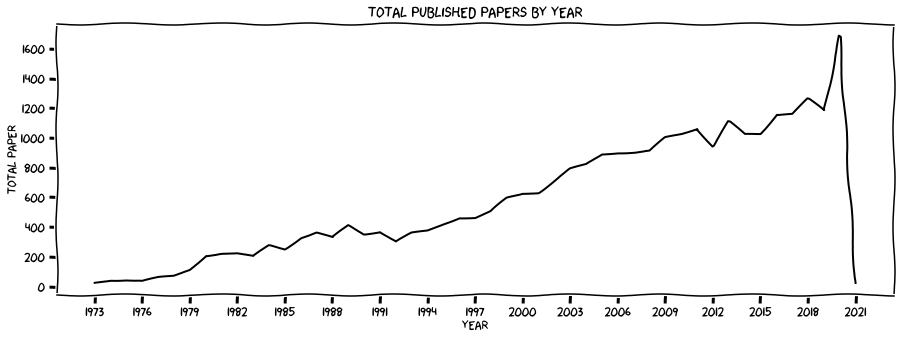

In [2]:
nber_paper.published_paper(nber_paper.count_by_year(nber), 'Total published papers by year', 3, 200)

### Acknowledgements

Next, you might be curious what would economists say in their acknowledgements. Are they kind enough to say thanks to their collaborators, donors, assistants, etc? Below, we can see there's a skyrocketing numbers of economists saying such thing since the early 21st century. Isn't it interesting? Why prevented them to say so prior these years? What factors that drive economists to be more kind human beings? Was it <strong>not</strong> a thing to write such thing acknowledgements in the past? Or maybe they didn't write one at all?

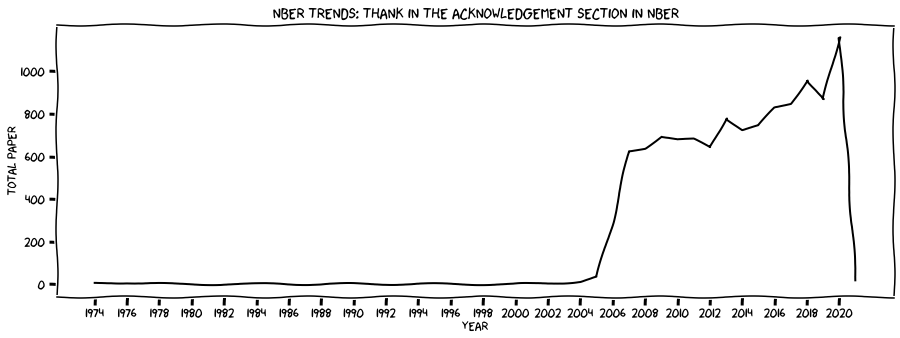

In [3]:
nber_paper.section_trends(nber, 'acknowledgement', 'thank', 'thank', 2, 200)

Here's another good trend among economists that seemed to start in the early 21st century: giving kind words in the acknowledgement, such as <strong>excellent research</strong>. I assume that these days published papers are more collaborative, which may involve research assistants in producing their works, hence it drives these economists to be more generous. Who do you think the most generous economists?

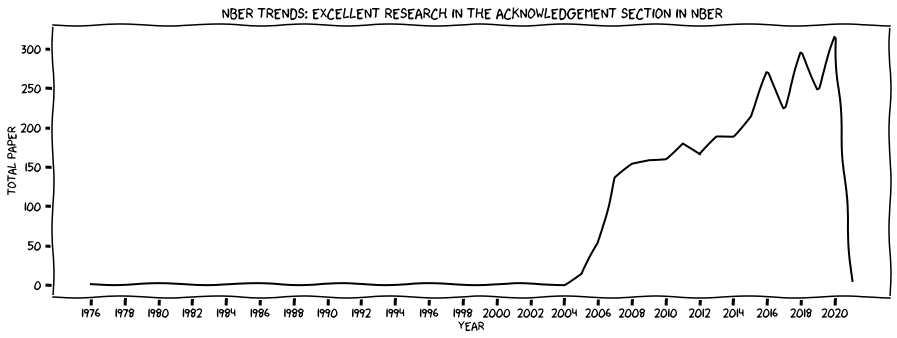

In [4]:
nber_paper.section_trends(nber, 'acknowledgement', 'excellent research', 'excellent research', 2, 50)

Among these five economists, you may be familiar with one name. Yes, it's [<strong>Daron Acemoglu</strong>](https://en.wikipedia.org/wiki/Daron_Acemoglu), one of the authors of the well known book titled [<strong>Why Nations Fail</strong>](https://en.wikipedia.org/wiki/Why_Nations_Fail). Looking at their Wikipedia pages, the other four seem to be also well known in the field of economics as well. 😄

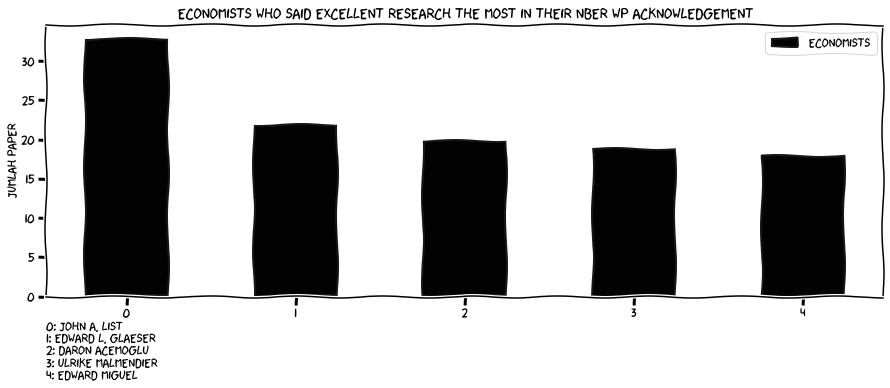

In [5]:
excellent = nber[(nber['acknowledgement'].isna() == False) & (nber['acknowledgement'].str.contains('excellent research'))]
excellent = nber_paper.top_five(excellent,'citation_author').reset_index(drop=True)
nber_paper.bar_plot(excellent, 'Economists', 'Economists who said excellent research the most in their NBER WP acknowledgement', 'citation_author')

Not only that, economists seem to be more transparent about fundings. Again, this is interesting to look at. Why did these trends start relatively at the same time? Is it mandatory among economists to publish in their NBER working papers?

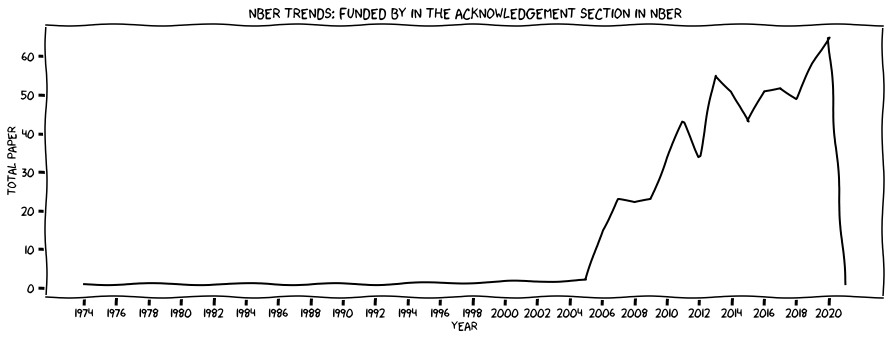

In [6]:
nber_paper.section_trends(nber, 'acknowledgement', 'funded by', 'funded by', 2, 10)

Further investigation about collaborations in economics can be seen below. I am not sure whether it's a good metric to measure collaboration, but here we can see that median total authors per paper in economics are between one and three. Maybe it's not because economics isn't a collaborative field per se, but the collaborators are perhaps not included as the authors.

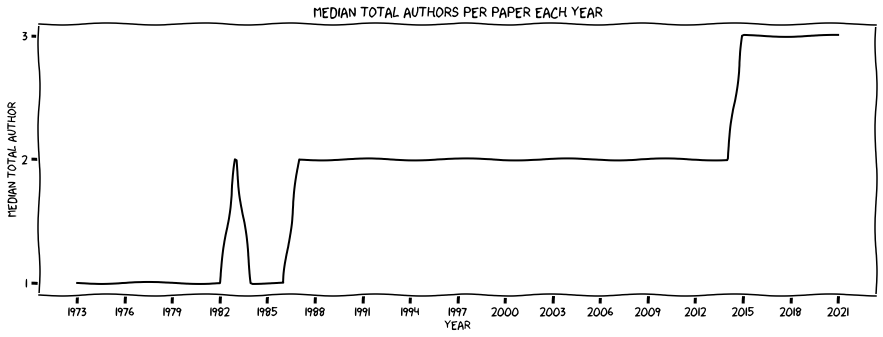

In [7]:
nber_paper.collaboration(nber)

### Abstract

Next thing I would like show is trends in the abstract section. From this, we may get the trends of economics over time. Below we can see the trends of [<strong>development</strong>](https://en.wikipedia.org/wiki/Development_economics) since early 1970s. It's interesting to see that it has ups and downs for each decade.

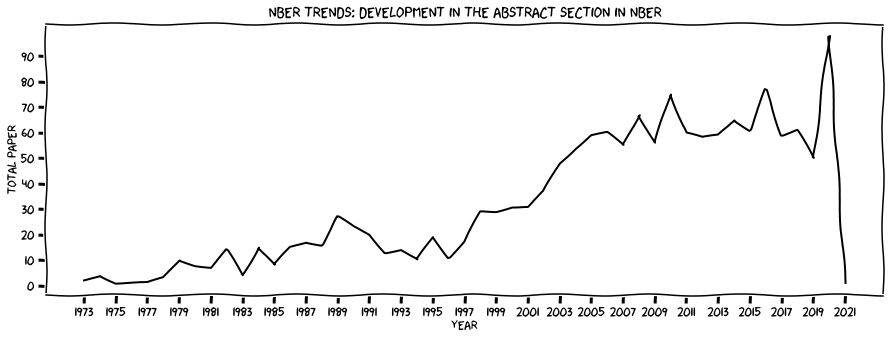

In [8]:
nber_paper.section_trends(nber, 'abstract', 'development', 'development', 2, 10)

We can also see that [<strong>randomized controlled trial<strong>](https://en.wikipedia.org/wiki/Randomized_controlled_trial) as a methodology started to gain traction in the early 21st century. However, its adoption is still relatively low nonetheless.

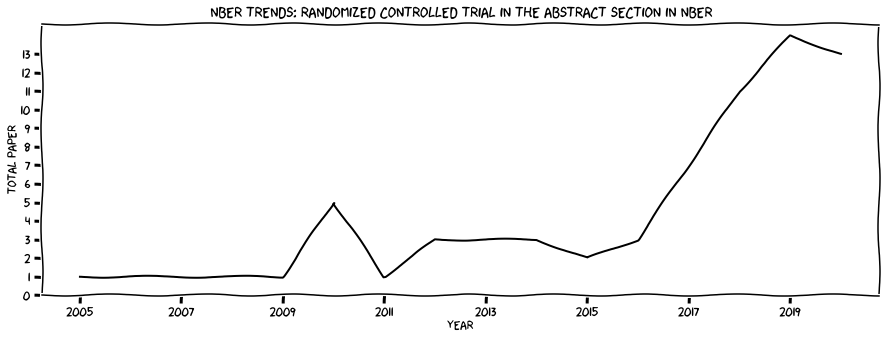

In [9]:
nber_paper.section_trends(nber, 'abstract', 'randomized controlled trial', 'randomized controlled trial', 2, 1)

Even more striking is trends of using <strong>pandemic</strong> in the abstract section. 2020 is hit hard by the COVID-19 pandemic and it looks like economists don't want to miss out a thing. A whopping working papers containing this word are published in 2020 alone!

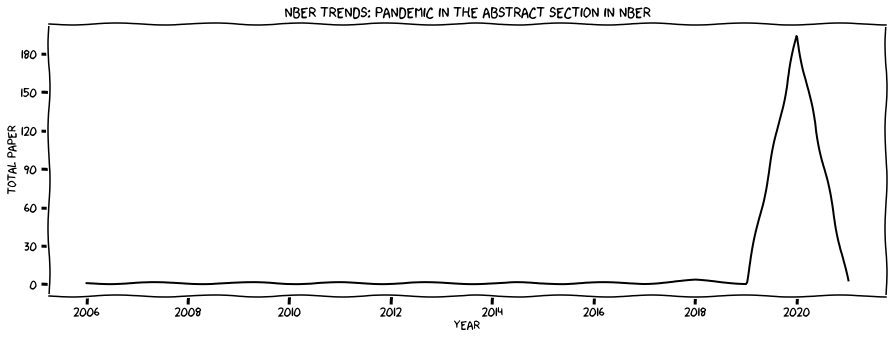

In [10]:
nber_paper.section_trends(nber, 'abstract', 'pandemic', 'pandemic', 2, 30)

# Citations

Networks do play a role in the academia, however big it is. One of the possible measurements is the citations. Below, I present the relationship between citing and being cited. In the horizontal axis, we can see the numbers of cites per paper; and the vertical axis tells us about how many times these papers are cited by other researchers. Note that no causality implied in this graph.

We can see that outliers exist in the citation game. There are a small numbers of papers that are cited over a thousand times despite only citing less than 50! On the other hand, some others cite more than one hundred and are only cited less than 500.

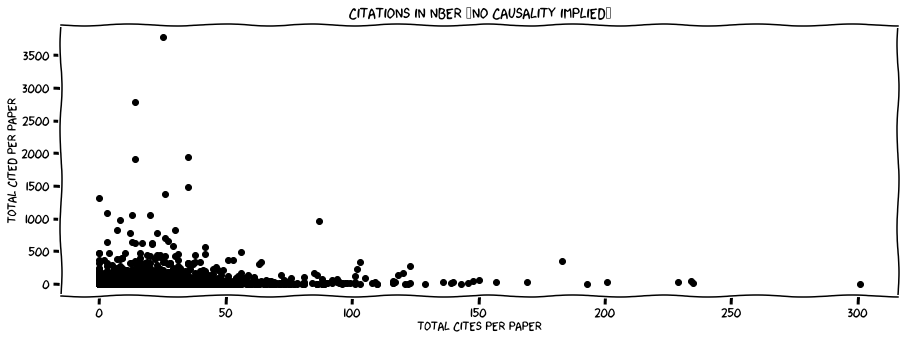

In [11]:
nber_paper.citation(repec)

What about the distributions? Total cites seem to be more normally distributed than total cited by (both log-scaled). In fact, it looks like that median cites are way more than median cited. Do you think that it makes sense? 

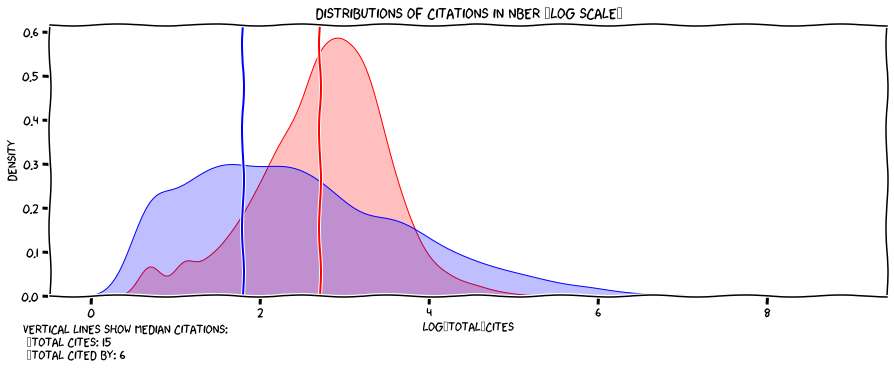

In [12]:
nber_paper.citation_density(repec)

# Popularity by topics

Like music or movies, economics also have genres or topics. Fortunately, NBER cover quite wide range of issues in their working papers. Each paper can contain more than one topics. So, in graph below I present the distinct numbers of times each topic appears in the papers. We can see that [<strong>Labor Studies</strong>](https://en.wikipedia.org/wiki/Labour_economics) is the most popular topic by far, where it cover around a thousand working papers in NBER.

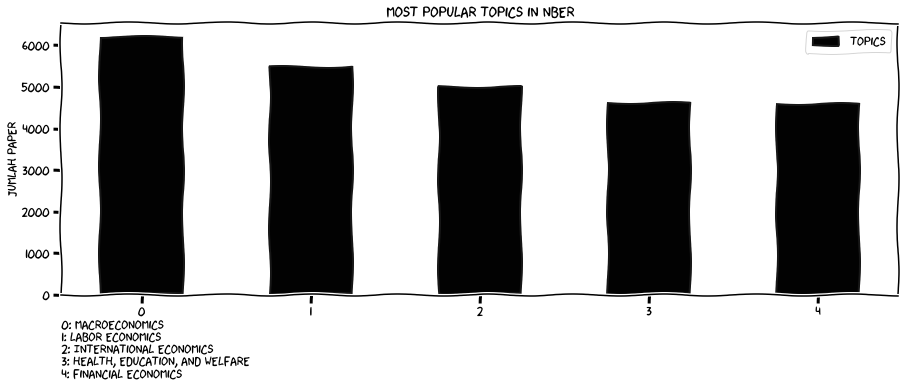

In [13]:
nber_paper.bar_plot(nber_paper.top_five(nber), 'Topics', 'Most popular topics in NBER', 'topics')

Despite the fluctuations, almost all of them have upward trends over the years. It looks like <strong>International Trade and Investment</strong> and <strong>International Finance and Macroeconomics</strong> are losing grounds in this field.

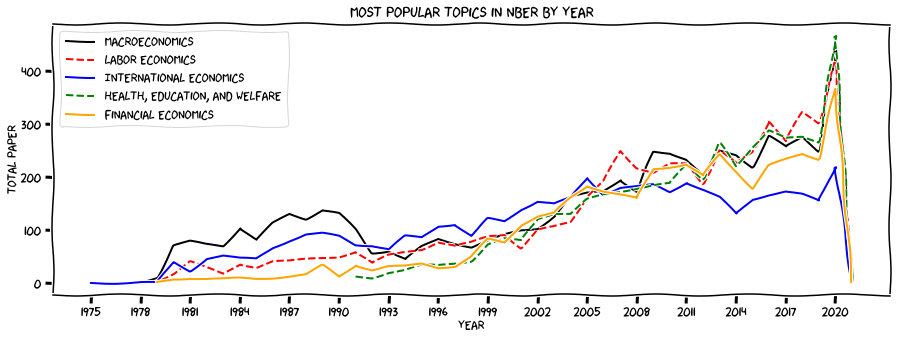

In [14]:
nber_paper.top_five_trends(nber, 'topics', 'Most popular topics in NBER by year')

# Prolific economists

Lastly I would like to highlight the most prolific economists. We can see that Daron Acemoglu appears to be among top five again (remember that he's one of those economists who said <strong>excellent research</strong> the most? 😀). Can you imagine how can he publish so many papers while also writing a popular book? What factors that contribute to his dedication in economics (is it <strong>passion</strong>? If not, then what do you think it is?

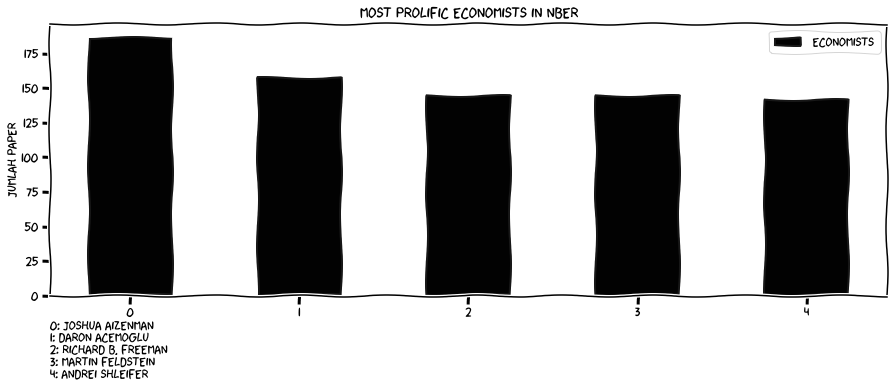

In [15]:
nber_paper.bar_plot(nber_paper.top_five(nber, 'citation_author'), 'Economists', 'Most prolific economists in NBER', 'citation_author')

These prolific economists happen to be seniors, whose career started since in the 1970s-80s, yet they are stil productive in present days (except Martin Feldstein, who died in 2019).

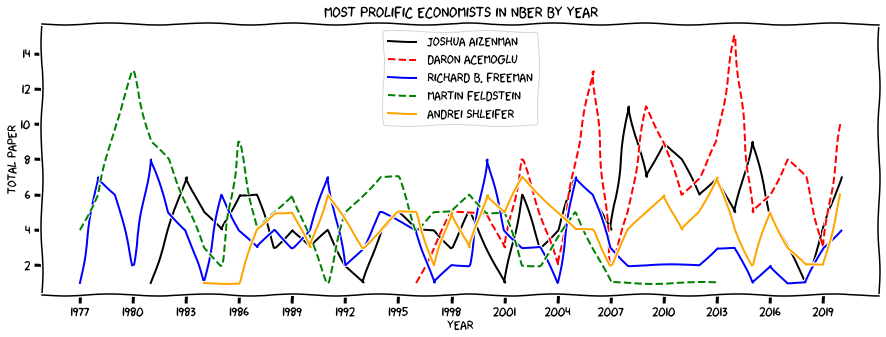

In [16]:
nber_paper.top_five_trends(nber, 'citation_author', 'Most prolific economists in NBER by year')

# Outro

If you have reached this point, I would like to say thank you and hopefully you enjoy this as much as I do in creating this stuff 😎. This notebook is automatically updated even if there's a new working paper coming and I may have to update the narratives as well (e.g. most popular topics in econs, etc).

Feel free to file issues if you happen to find bugs in the code or if you have any questions. Cheers! 🍻